<a href="https://colab.research.google.com/github/RitvikVankayala/NLP/blob/main/Count_vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import wordnet

In [3]:
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

For the data set importing from any world wide web server !wget -nc is used

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2022-12-29 07:47:46--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  --.-KB/s    in 0.08s   

2022-12-29 07:47:47 (58.0 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [5]:
df=pd.read_csv('bbc_text_cls.csv')

In [6]:
# how the data looks like
df.head()
len(df)

2225

In [7]:
inputs=df['text']
labels=df['labels']
print(inputs)

0       Ad sales boost Time Warner profit\n\nQuarterly...
1       Dollar gains on Greenspan speech\n\nThe dollar...
2       Yukos unit buyer faces loan claim\n\nThe owner...
3       High fuel prices hit BA's profits\n\nBritish A...
4       Pernod takeover talk lifts Domecq\n\nShares in...
                              ...                        
2220    BT program to beat dialler scams\n\nBT is intr...
2221    Spam e-mails tempt net shoppers\n\nComputer us...
2222    Be careful how you code\n\nA new European dire...
2223    US cyber security chief resigns\n\nThe man mak...
2224    Losing yourself in online gaming\n\nOnline rol...
Name: text, Length: 2225, dtype: object


For plotting a histogram for analysing the data

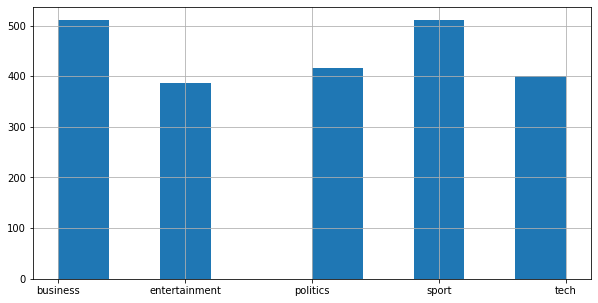

In [8]:
labels.hist(figsize=(10,5))

For getting a subset of the dataset

In [9]:
inputs_train,inputs_test,Ytrain,Ytest=train_test_split(inputs,labels,test_size=0.2,random_state=123)

In [10]:
vectorizer=CountVectorizer()

In [11]:
Xtrain=vectorizer.fit_transform(inputs_train)
Xtest=vectorizer.transform(inputs_test)

In [12]:
Xtrain.toarray()

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
# vectorizer.get_feature_names()

In [14]:
(Xtrain!=0).sum()

359094

Percentage of non zero values


In [15]:
(Xtrain!=0).sum()/np.prod(Xtrain.shape)

0.0074912069159744155

In [16]:
# test=vectorizer.fit_transform(['hi how are you, how are you doing?','hey whats app,how are you doing with your work'])

In [17]:
# test.toarray()

In [18]:
# vectorizer.get_feature_names()

In [19]:
model=MultinomialNB()
model.fit(Xtrain,Ytrain)
print("test_score",model.score(Xtrain,Ytrain))
print("test_score",model.score(Xtest,Ytest))

test_score 0.9921348314606742
test_score 0.9685393258426966


Now we will try to increase the accuracy of the prediction

In [35]:
#stop words
vectorizer=CountVectorizer(stop_words='english',min_df=1)
Xtrain=vectorizer.fit_transform(inputs_train)
Xtest=vectorizer.transform(inputs_test)
model=MultinomialNB()
model.fit(Xtrain,Ytrain)
print("test_score",model.score(Xtrain,Ytrain))
print("test_score",model.score(Xtest,Ytest))

test_score 0.9932584269662922
test_score 0.9730337078651685


Now we will try to lemmatize the data for better accuracy

In [21]:
#token_converter

def get_wordnet_pos(treebank_tag):
  if(treebank_tag.startswith('J')):
    return wordnet.ADJ
  elif(treebank_tag.startswith('V')):
    return wordnet.VERB
  elif(treebank_tag.startswith('N')):
    return wordnet.NOUN
  elif (treebank_tag.startswith('R')):
    return wordnet.ADV
  else:
      return wordnet.NOUN


Creating LemmaTokenizer class with constructor _init_ with an instance of wordnetlemmatizer and a _call_ for running the lemmatize function on the document

And also find the reason why the class based function is not working

In [49]:
# class LemmaTokenizer:
#   def __init__(self) :
#     self.wnl=WordNetLemmatizer()
#   def _call_(self,doc):
#     tokens=word_tokenize(doc)
#     words_and_tags=nltk.pos_tag(tokens)
#     return [self.wnl.lemmatize(word,pos=get_wordnet_pos(tag))\
#             for word, tag in words_and_tags]
def LemmaTokenizer(doc):
  wnl=WordNetLemmatizer()
  tokens=word_tokenize(doc)
  words_and_tags=nltk.pos_tag(tokens)
  return [wnl.lemmatize(word,pos=get_wordnet_pos(tag))\
          for word,tag in words_and_tags]

In [57]:
 # Lemmatization
vectorizer=CountVectorizer(tokenizer=LemmaTokenizer)
Xtrain=vectorizer.fit_transform(inputs_train)
print(Xtrain.shape)
Xtest=vectorizer.transform(inputs_test)
model=MultinomialNB()
model.fit(Xtrain,Ytrain)
print("test_score",model.score(Xtrain,Ytrain))
print("test_score",model.score(Xtest,Ytest))

(1780, 26733)
test_score 0.9921348314606742
test_score 0.9662921348314607


Try to find the reason why the class based function is not working

In [45]:
# class StemTokenizer:
#   def __init__(self):
#     self.porter=PorterStemmer()
#   def _call_(self,doc):
#     tokens=word_tokenize(doc)
#     return [self.porter.stem(t) for t in tokens]

def StemTokenizer(doc):
  porter=PorterStemmer()
  tokens=word_tokenize(doc)
  return [porter.stem(t) for t in tokens]

In [56]:
# Stemming
vectorizer=CountVectorizer(tokenizer=StemTokenizer)
Xtrain=vectorizer.fit_transform(inputs_train)
print(Xtrain.shape)
Xtest=vectorizer.transform(inputs_test)
model=MultinomialNB()
model.fit(Xtrain,Ytrain)
print("test_score",model.score(Xtrain,Ytrain))
print("test_score",model.score(Xtest,Ytest))

(1780, 23486)
test_score 0.9898876404494382
test_score 0.9685393258426966


In [39]:
def simple_tokenizer(s):
  return s.split()

In [55]:
# string split tokenizer
vectorizer=CountVectorizer(tokenizer=simple_tokenizer)
Xtrain=vectorizer.fit_transform(inputs_train)
print(Xtrain.shape)
Xtest=vectorizer.transform(inputs_test)
model=MultinomialNB()
model.fit(Xtrain,Ytrain)
print("test_score",model.score(Xtrain,Ytrain))
print("test_score",model.score(Xtest,Ytest))

(1780, 53824)
test_score 0.9955056179775281
test_score 0.9707865168539326
